<a href="https://colab.research.google.com/github/PrachitiSParulekar/machine-learning-end-to-end-pipeline/blob/main/knn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

In [ ]:
import numpy as np
import pandas as pd
X = pd.DataFrame(X, columns=data.feature_names)
y = pd.Series(y, name='target')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


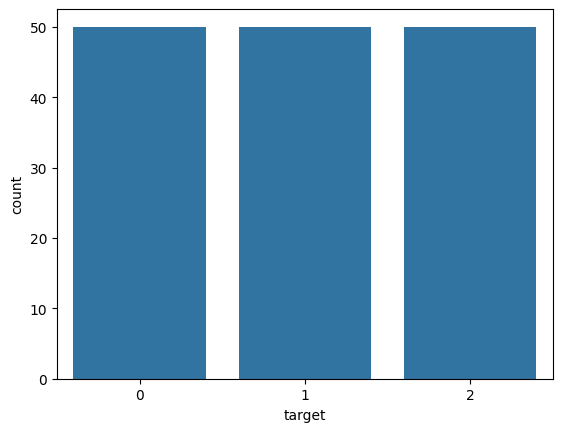

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y)
plt.show()

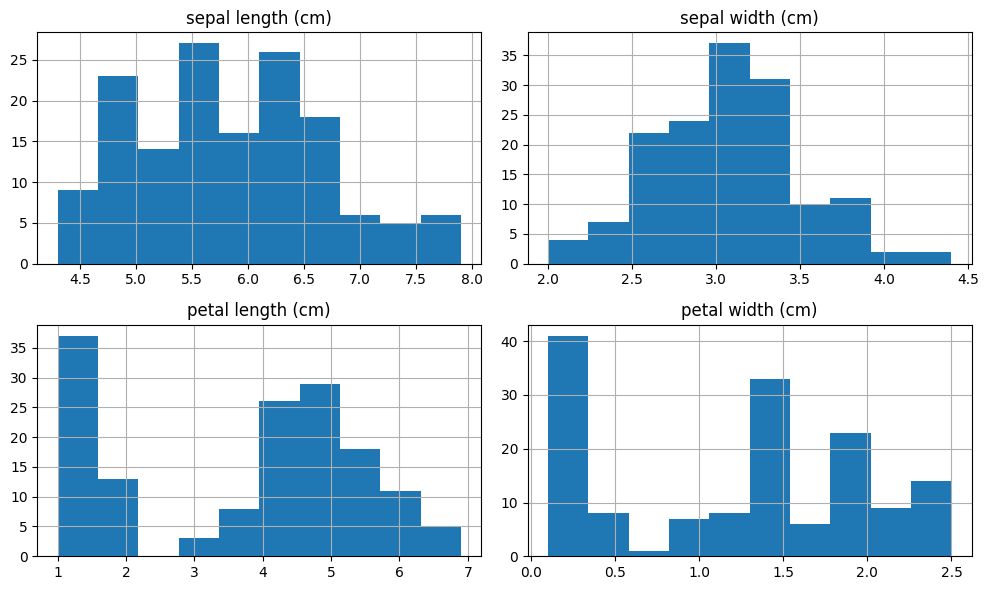

In [ ]:
X.hist(figsize=(10,6))
plt.tight_layout()
plt.show()

In [ ]:
print(X.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean', weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

Test Accuracy: 0.9333333333333333


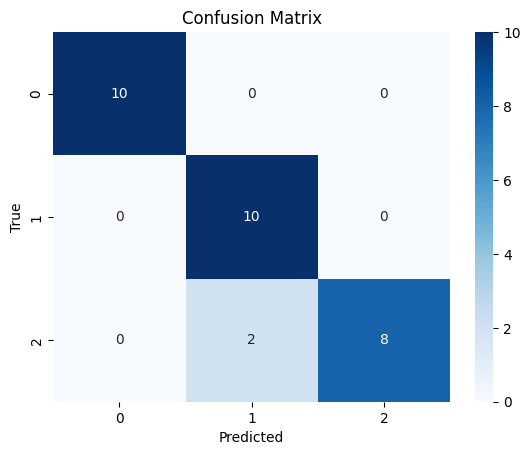

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = knn.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


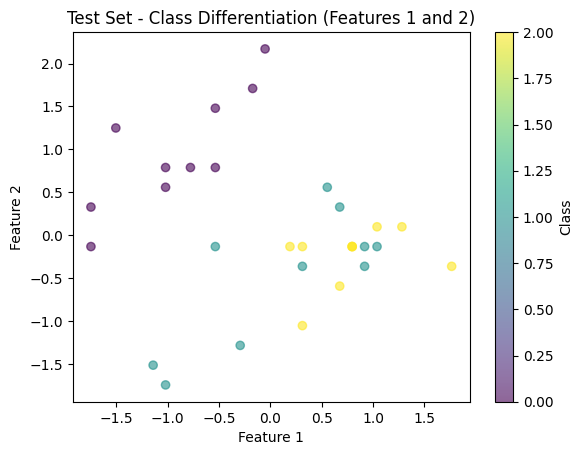

In [ ]:
# Simple scatter plot to differentiate classes in the test set
import matplotlib.pyplot as plt
import numpy as np

# Use the first two features for visualization and color by true labels
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', alpha=0.6)

plt.title('Test Set - Class Differentiation (Features 1 and 2)')
plt.xlabel('Feature 1') # Use generic label
plt.ylabel('Feature 2') # Use generic label
plt.colorbar(label='Class') # Add a color bar to indicate class mapping
plt.show()

In [ ]:
#analyze missclassifed example
import numpy as np
import pandas as pd

# Find misclassified indices
misclassified_idx = np.where(y_test != y_pred)[0]

# Print misclassified indices, true labels, and predicted labels
print("Misclassified Indices (in the test set):", misclassified_idx)
print("True Labels of Misclassified Samples:", y_test.values[misclassified_idx])
print("Predicted Labels of Misclassified Samples:", y_pred[misclassified_idx])

Misclassified Indices (in the test set): [19 23]
True Labels of Misclassified Samples: [2 2]
Predicted Labels of Misclassified Samples: [1 1]


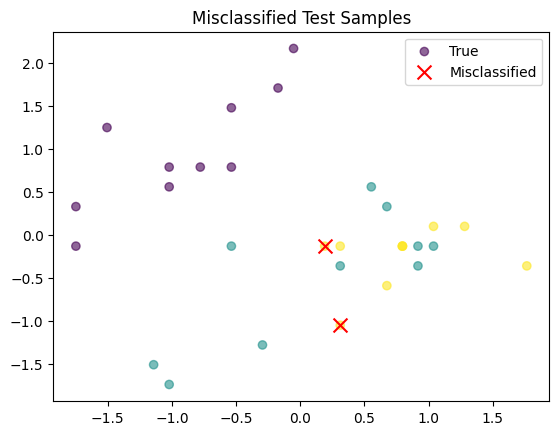

In [ ]:
# If using first two features for 2D visualization
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True', alpha=0.6)
plt.scatter(
    X_test[misclassified_idx, 0],
    X_test[misclassified_idx, 1],
    c='red', marker='x', label='Misclassified', s=100
)
plt.title("Misclassified Test Samples")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(1, 21)),  # Try K=1 to K=20
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,            # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)

# Evaluate best estimator on test data
best_knn = grid.best_estimator_
y_test_pred = best_knn.predict(X_test)
print("Test accuracy with best KNN:", accuracy_score(y_test, y_test_pred))


Best parameters: {'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'distance'}
Best cross-validated accuracy: 0.975
Test accuracy with best KNN: 0.9666666666666667


In [ ]:
from sklearn.model_selection import cross_val_score

for feature in range(X.shape[1]):
    # Exclude one feature at a time
    X_new = np.delete(X_scaled, feature, axis=1)
    scores = cross_val_score(KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors']), X_new, y, cv=5)
    print(f"Excluding feature {feature}: Avg accuracy = {scores.mean():.3f}")


Excluding feature 0: Avg accuracy = 0.967
Excluding feature 1: Avg accuracy = 0.947
Excluding feature 2: Avg accuracy = 0.927
Excluding feature 3: Avg accuracy = 0.887


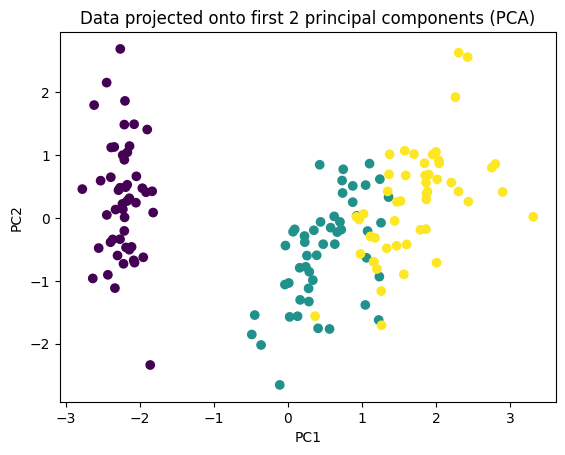

Explained variance ratios: [0.72962445 0.22850762]


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("Data projected onto first 2 principal components (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained variance ratios:", pca.explained_variance_ratio_)

predict_proba is a method in scikit-learn classifiers (including KNeighborsClassifier) that gives you the probability estimate for each class label, instead of just the most likely (hard) class.

In [ ]:
# Only available for some classifiers: KNeighborsClassifier supports predict_proba
probs = best_knn.predict_proba(X_test)
misclassified = y_test != y_test_pred

import numpy as np
import pandas as pd

proba_df = pd.DataFrame(probs, columns=[f"proba_{i}" for i in best_knn.classes_])
proba_df['true_label'] = y_test.values
proba_df['pred_label'] = y_test_pred
proba_df['misclassified'] = misclassified.values

# Show only misclassified, sorted by their predicted probability for the true class
print(proba_df[proba_df['misclassified']].sort_values('true_label'))

    proba_0   proba_1   proba_2  true_label  pred_label  misclassified
25      0.0  0.462662  0.537338           1           2           True


In [ ]:
# For each misclassified test point, find mean distance to its neighbors
distances, indices = best_knn.kneighbors(X_test)
df_distances = pd.DataFrame({
    'mean_distance_to_neighbors': distances.mean(axis=1),
    'is_misclassified': misclassified.values,
    'true_label': y_test.values,
    'pred_label': y_test_pred
})
print(df_distances[df_distances['is_misclassified']])


    mean_distance_to_neighbors  is_misclassified  true_label  pred_label
25                     0.65759              True           1           2


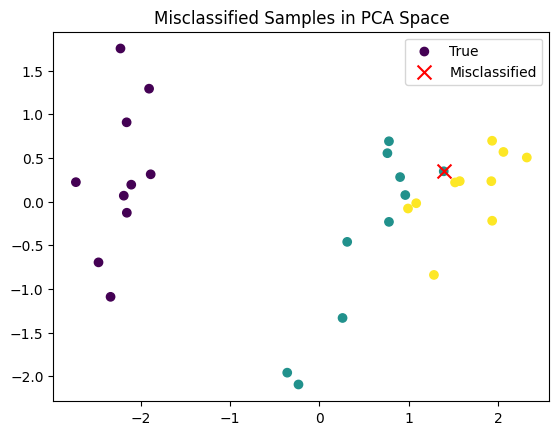

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', label='True')
plt.scatter(X_test_pca[misclassified, 0], X_test_pca[misclassified, 1], c='red', label='Misclassified', marker='x', s=100)
plt.legend()
plt.title('Misclassified Samples in PCA Space')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
confusion_df = pd.DataFrame(cm, index=best_knn.classes_, columns=best_knn.classes_)
print("Confusion Matrix:\n", confusion_df)

Confusion Matrix:
     0  1   2
0  10  0   0
1   0  9   1
2   0  0  10
